In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf


def mae(y_test, y_pred):

  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):

  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)


# Function to generate the dataset
np.random.seed(0)  # for reproducibility
X = np.random.rand(1000, 1) * 20 - 10  # Features between -10 and 10
y = 0.5 * X - 2 + np.random.randn(1000, 1) * 2  # Linear relation with noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model 1 Звичайна

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_1 = Sequential([
    Dense(32, input_dim=1, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(1)  
])
model_1.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])
history_1 = model_1.fit(X_train, y_train, validation_split=0.2, epochs=200, verbose=0)

mse_1 = history_1.history['mean_squared_error'][-1]
mae_1 = history_1.history['mean_absolute_error'][-1]


### Model 2 Додатковий Прихований Шар

In [10]:

model_2 = Sequential([
    Dense(32, input_dim=1, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(1)  
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])

# Fit the model
history_2 = model_2.fit(X_train, y_train, epochs=200, validation_split=0.2, verbose=0) # set verbose to 0 for less output

mse_2 = history_2.history['mean_squared_error'][-1]
mae_2 = history_2.history['mean_absolute_error'][-1]


### Model 3 Збільшена кількість нейронів

In [11]:

model_3 = Sequential([
    Dense(64, input_dim=1, activation='relu'), 
    Dense(64, activation='relu'), 
    Dense(1)  
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])

# Fit the model (this time for 500 epochs, not 100)
history_3 = model_3.fit(X_train, y_train, epochs=200, verbose=0,  validation_split=0.2) # set verbose to 0 for less output

mse_3 = history_3.history['mean_squared_error'][-1]
mae_3 = history_3.history['mean_absolute_error'][-1]


### Model 4 Змінена швидкість навчання

In [12]:

model_4 = Sequential([
    Dense(32, input_dim=1, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(1)  
])

model_4.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])

history_4 = model_4.fit(X_train, y_train, epochs=200, verbose=0,  validation_split=0.2) # set verbose to 0 for less output

mse_4 = history_4.history['mean_squared_error'][-1]
mae_4 = history_4.history['mean_absolute_error'][-1]


### Model 5 Збільшена кількість епох

In [13]:

model_5 = Sequential([
    Dense(32, input_dim=1, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(1)  
])

# Compile the model
model_5.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])

# Fit the model
history_5 = model_5.fit(X_train, y_train, epochs=300, verbose=0,  validation_split=0.2) # set verbose to 0 for less output

mse_5 = history_5.history['mean_squared_error'][-1]
mae_5 = history_5.history['mean_absolute_error'][-1]


### Model 6 Всі зміни одразу

In [14]:

model_6 = Sequential([
    Dense(64, input_dim=1, activation='relu'), 
    Dense(64, activation='relu'), 
    Dense(64, activation='relu'), 
    Dense(1)  
])

# Compile the model
model_6.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])

# Fit the model
history_6 = model_6.fit(X_train, y_train, epochs=300, verbose=0,  validation_split=0.2) # set verbose to 0 for less output

mse_6 = history_6.history['mean_squared_error'][-1]
mae_6 = history_6.history['mean_absolute_error'][-1]

In [15]:
import matplotlib.pyplot as plt
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3],
                 ["model_4", mae_4, mse_4],
                 ["model_5", mae_5, mse_5],
                 ["model_6", mae_6, mse_6]]
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,1.553161,3.794325
1,model_2,1.550302,3.795129
2,model_3,1.569274,3.847481
3,model_4,1.549410,3.782342
4,model_5,1.580540,3.907657
5,model_6,1.559455,3.827727


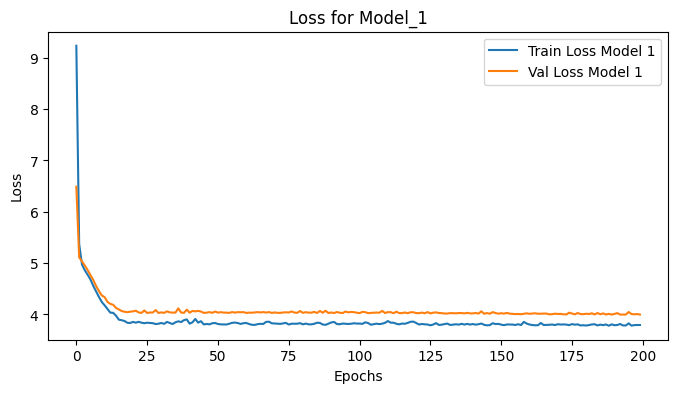

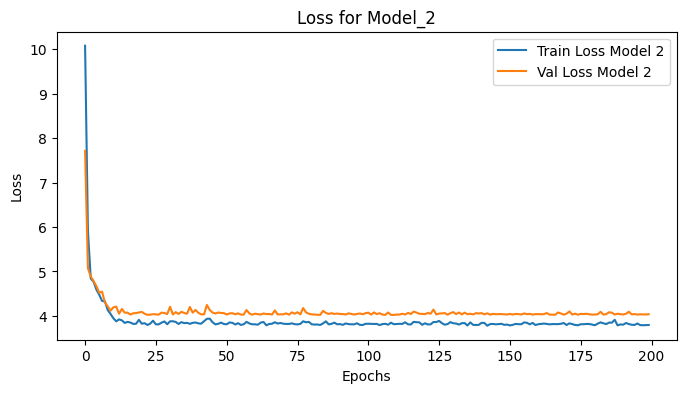

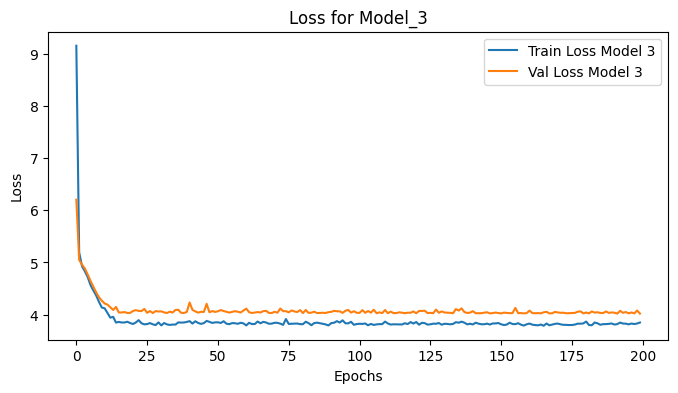

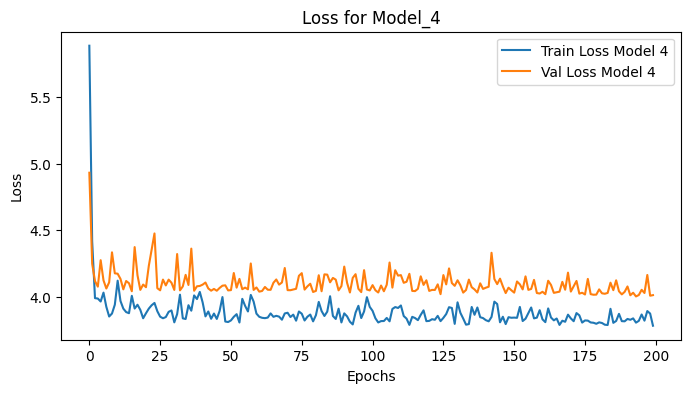

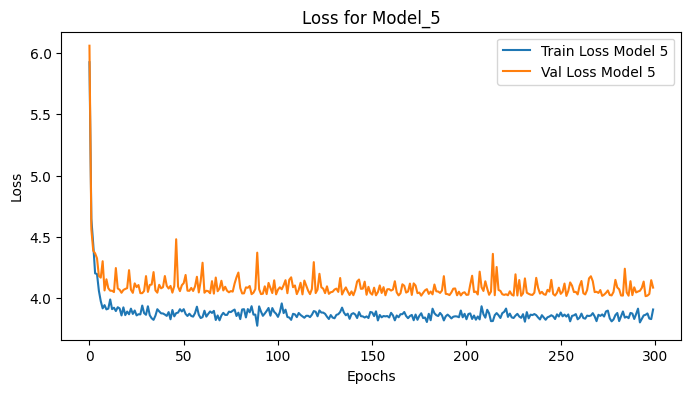

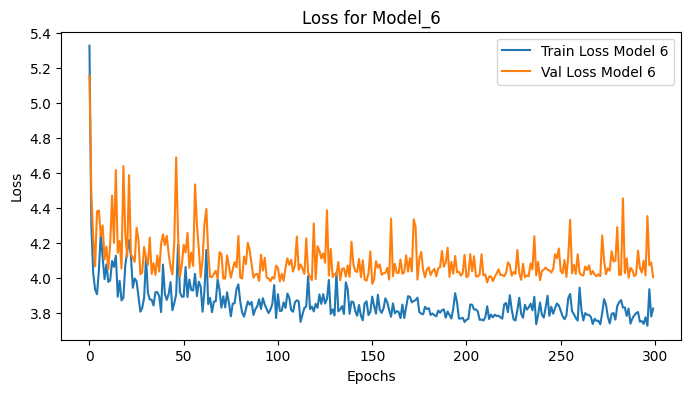

In [16]:

history_list = [history_1, history_2, history_3, history_4, history_5, history_6]

# Plot the training and validation loss for each model
for i, history in enumerate(history_list, start=1):
    plt.figure(figsize=(8, 4))  # Create a new figure for each model
    plt.plot(history.history['loss'], label='Train Loss Model {}'.format(i))
    plt.plot(history.history['val_loss'], label='Val Loss Model {}'.format(i))
    plt.title('Loss for Model_{}'.format(i))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

